<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-&quot;Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются&quot;" data-toc-modified-id="Гипотеза-&quot;Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"</a></span></li><li><span><a href="#Гипотеза-&quot;Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;" data-toc-modified-id="Гипотеза-&quot;Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные 500 пользователей сотового оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».

Цель проекта - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
# Импортируем нужные библиотеки;
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Откроем файлы с данными и сохраним в переменные:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

# Изучим все таблицы:

In [2]:
calls.info()
display(calls.head())
display(calls.describe())
display(calls.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [3]:
internet.info()
display(internet.head())
display(internet.describe())
display(internet.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [4]:
messages.info()
display(messages.head())
display(messages.describe())
display(messages.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


id              0
message_date    0
user_id         0
dtype: int64

In [5]:
tariffs.info()
display(tariffs.head())
display(tariffs.describe())
display(tariffs.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [6]:
users.info()
display(users.head())
display(users.describe())
display(users.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [7]:
display(users['tariff'].value_counts())
display(users['city'].unique())

smart    351
ultra    149
Name: tariff, dtype: int64

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

## Подготовка данных

In [8]:
# Создадим словарь с месяцами для идентификации месяцев по номеру:
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [9]:
# Округлим количество минут в звонках в большую сторону.
# Для этого прибавим 0.5 и округлим полученное значение методом round().
# Приведем минуты к целочисленному типу данных:
calls['duration'] = (calls['duration']+0.50).round().astype(int)

# Даты звонков приведем в формат даты:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Создадим столбец с месяцами звонков, применим словарь с месяцами для замена номера месяца на название:
calls['month'] = calls['call_date'].dt.month
calls['month'] = calls['month'].apply(lambda x: months[x])
calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [10]:
# Создадим таблицы с сгруппированными данными по абонентам и месяцам.
# Первая таблица с общей длительностью звонков, вторая - с их количеством:
calls_grouped_dur_sum = calls.groupby(by=['user_id','month'], as_index=False)['duration'].sum()
calls_grouped_dur_count = calls.groupby(by=['user_id','month'], as_index=False)['duration'].count()

# Объединим таблицы в одну методом merge():
calls_grouped = calls_grouped_dur_sum.merge(calls_grouped_dur_count, how='outer', on=['user_id','month'])
calls_grouped.columns=['user_id', 'month', 'calls_duration', 'calls_count']

calls_grouped.info()
display(calls_grouped.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null object
calls_duration    3174 non-null int64
calls_count       3174 non-null int64
dtypes: int64(3), object(1)
memory usage: 124.0+ KB


,user_id,month,calls_duration,calls_count
0,1000,August,409,52
1,1000,December,333,46
2,1000,July,340,47
3,1000,June,172,43
4,1000,May,159,22


In [11]:
# Округлим количество потраченных абонентами мегабайт в большую сторону.
# Для этого прибавим 0.5 и округлим полученное значение методом round().
# Приведем мегабайты к целочисленному типу данных:
internet['mb_used'] = (internet['mb_used']+0.50).round().astype(int)

# Даты интернет-сессий приведем в формат даты:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#Создадим столбец с месяцами интернет-сессий, применим словарь с месяцами для замена номера месяца на название:
internet['month'] = internet['session_date'].dt.month
internet['month'] = internet['month'].apply(lambda x: months[x])
internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.8+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,November
1,1,1000_1,1053,2018-09-07,1000,September
2,2,1000_2,1198,2018-06-25,1000,June
3,3,1000_3,551,2018-08-22,1000,August
4,4,1000_4,303,2018-09-24,1000,September


In [12]:
# Создадим таблицу с сгруппированными данными по абонентам и месяцам по суммарному количеству интернет-траффика:
internet_grouped = internet.groupby(by=['user_id','month'], as_index=False)['mb_used'].sum()
# Мегабайты переведем в гигабайты (соответствующий столбец переименуем):
internet_grouped['mb_used'] = ((internet_grouped['mb_used'] / 1024)+0.50).round().astype(int)
internet_grouped.columns=['user_id', 'month', 'gb_used']
display(internet_grouped)

,user_id,month,gb_used
0,1000,August,14
1,1000,December,10
2,1000,July,14
3,1000,June,23
4,1000,May,3
...,...,...,...
3198,1498,September,22
3199,1499,December,13
3200,1499,November,18
3201,1499,October,18


In [13]:
# Даты отправки сообщений приведем в формат даты:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#Создадим столбец с месяцами отправки собщений, применим словарь с месяцами для замена номера месяца на название:
messages['month'] = messages['message_date'].dt.month
messages['month'] = messages['month'].apply(lambda x: months[x])
messages.info()
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [14]:
# Создадим таблицу с сгруппированными данными по абонентам и месяцам по суммарному количеству отправленных смс:
messages_grouped = messages.groupby(by=['user_id','month'], as_index=False)['id'].count()
messages_grouped.columns=['user_id', 'month', 'messages_count']
display(messages_grouped.head())

,user_id,month,messages_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


In [15]:
#В таблице 'users' столбцы 'churn_date' и 'reg_date' приведем в формат даты:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
# Объединим сгруппированные таблица со звонками, сообщениями, интернет-траффиком в одну методом merge().
# Для параметра how используем значение 'outer', чтобы в итоговую таблицу попали все строки из всех 3 таблиц:
users_stat = calls_grouped.merge(
    internet_grouped, how='outer', on=['user_id','month']).merge(
    messages_grouped, how='outer', on=['user_id','month'])
users_stat.info()
display(users_stat.head())
display(users_stat.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null object
calls_duration    3174 non-null float64
calls_count       3174 non-null float64
gb_used           3203 non-null float64
messages_count    2717 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


,user_id,month,calls_duration,calls_count,gb_used,messages_count
0,1000,August,409.0,52.0,14.0,81.0
1,1000,December,333.0,46.0,10.0,70.0
2,1000,July,340.0,47.0,14.0,75.0
3,1000,June,172.0,43.0,23.0,60.0
4,1000,May,159.0,22.0,3.0,22.0


,user_id,calls_duration,calls_count,gb_used,messages_count
count,3214.000000,3174.000000,3174.000000,3203.000000,2717.000000
mean,1251.590230,457.183050,63.833333,17.390259,45.283769
std,144.659172,238.151168,32.678036,7.354888,35.051363
min,1000.000000,0.000000,1.000000,0.000000,1.000000
25%,1125.000000,290.000000,41.000000,13.000000,19.000000
50%,1253.000000,447.500000,63.000000,17.000000,38.000000
75%,1378.750000,592.000000,83.000000,21.000000,63.000000
max,1499.000000,1674.000000,244.000000,49.000000,224.000000


In [17]:
# Проведем проверку что все значения попали в итоговую таблицу.
# Сравним продолжительность звонков в исходной (после округления) и итоговой таблицах:
display(calls['duration'].sum()==users_stat['calls_duration'].sum())
# Сравним количество ГБ в исходной (после округления) и итоговой таблицах:
display(internet_grouped['gb_used'].sum()==users_stat['gb_used'].sum())
# Сравним количество сообщений (по общему количеству строк) в исходной и итоговой таблицах:
display(messages['id'].count()==users_stat['messages_count'].sum())

True

True

True

In [18]:
# Выделим в таблице users нужные для объединения столбцы:
users_and_tariff = users[['user_id','tariff', 'city']]
# Соединим таблицы users и users_stat:
users_stat = users_stat.merge(users_and_tariff)
display(users_stat.head())

,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,city
0,1000,August,409.0,52.0,14.0,81.0,ultra,Краснодар
1,1000,December,333.0,46.0,10.0,70.0,ultra,Краснодар
2,1000,July,340.0,47.0,14.0,75.0,ultra,Краснодар
3,1000,June,172.0,43.0,23.0,60.0,ultra,Краснодар
4,1000,May,159.0,22.0,3.0,22.0,ultra,Краснодар


In [19]:
# Соединим таблицы users_stat и tariff:
users_stat = users_stat.merge(tariffs, left_on='tariff', right_on='tariff_name')
# Удалим дублирующийся столбец 'tariff_name':
users_stat.pop('tariff_name')
display(users_stat.head())

,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,409.0,52.0,14.0,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,December,333.0,46.0,10.0,70.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,July,340.0,47.0,14.0,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,June,172.0,43.0,23.0,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,May,159.0,22.0,3.0,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [20]:
# Мегабайты переведем в гигабайты и приведем к целочисленному виду:
users_stat['mb_per_month_included'] = (users_stat['mb_per_month_included']/1024).astype(int)
# Переименуем столбец в ГБ:
users_stat.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
display(users_stat.head())

,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,409.0,52.0,14.0,81.0,ultra,Краснодар,1000,30,3000,1950,150,1,1
1,1000,December,333.0,46.0,10.0,70.0,ultra,Краснодар,1000,30,3000,1950,150,1,1
2,1000,July,340.0,47.0,14.0,75.0,ultra,Краснодар,1000,30,3000,1950,150,1,1
3,1000,June,172.0,43.0,23.0,60.0,ultra,Краснодар,1000,30,3000,1950,150,1,1
4,1000,May,159.0,22.0,3.0,22.0,ultra,Краснодар,1000,30,3000,1950,150,1,1


In [21]:
# Создадим столбцы с минутами, смс и Гб, потраченными абонентами сверх бесплатного лимита.
# (если абонент не вышел за бесплатный лимит - значение в столбце будет равно нулю):
users_stat['min_over_limit'] = (users_stat['calls_duration'] 
    - users_stat['minutes_included']).where(
    users_stat['calls_duration'] > users_stat['minutes_included'], 0)

users_stat['messages_over_limit'] = (users_stat['messages_count'] 
    - users_stat['messages_included']).where(
    users_stat['messages_count'] > users_stat['messages_included'], 0)

users_stat['gb_over_limit'] = (users_stat['gb_used'] 
    - users_stat['gb_per_month_included']).where(
    users_stat['gb_used'] > users_stat['gb_per_month_included'], 0)

users_stat['monthly_revenue'] = (users_stat['rub_monthly_fee'] + 
    users_stat['rub_per_minute'] * users_stat['min_over_limit'] +
    users_stat['rub_per_message'] * users_stat['messages_over_limit'] +
    users_stat['rub_per_gb'] * users_stat['gb_over_limit']                               
)

display(users_stat.head())
display(users_stat.describe())

,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue
0,1000,August,409.0,52.0,14.0,81.0,ultra,Краснодар,1000,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,December,333.0,46.0,10.0,70.0,ultra,Краснодар,1000,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,July,340.0,47.0,14.0,75.0,ultra,Краснодар,1000,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,June,172.0,43.0,23.0,60.0,ultra,Краснодар,1000,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,May,159.0,22.0,3.0,22.0,ultra,Краснодар,1000,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


,user_id,calls_duration,calls_count,gb_used,messages_count,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue
count,3214.000000,3174.000000,3174.000000,3203.000000,2717.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,457.183050,63.833333,17.390259,45.283769,341.148102,19.597075,1266.179216,979.060361,184.676416,2.387057,2.387057,28.936528,4.022402,2.336963,1532.962041
std,144.659172,238.151168,32.678036,7.354888,35.051363,438.044726,6.916496,1152.749279,645.539596,23.054986,0.922199,0.922199,73.188698,11.508916,3.532080,799.852029
min,1000.000000,0.000000,1.000000,0.000000,1.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,290.000000,41.000000,13.000000,19.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,750.000000
50%,1253.000000,447.500000,63.000000,17.000000,38.000000,50.000000,15.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1667.500000
75%,1378.750000,592.000000,83.000000,21.000000,63.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,0.000000,0.000000,4.000000,1950.000000
max,1499.000000,1674.000000,244.000000,49.000000,224.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,937.000000,93.000000,23.000000,6770.000000


In [22]:
users_stat['monthly_revenue'].describe()

count    3214.000000
mean     1532.962041
std       799.852029
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: monthly_revenue, dtype: float64

## Анализ данных

In [23]:
# Создадим итоговую таблицу, оставим только нужные столбцы:
display(users_stat.columns)

Index(['user_id', 'month', 'calls_duration', 'calls_count', 'gb_used',
       'messages_count', 'tariff', 'city', 'messages_included',
       'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'min_over_limit',
       'messages_over_limit', 'gb_over_limit', 'monthly_revenue'],
      dtype='object')

In [24]:
all_users_stat = users_stat[['user_id', 'month', 'calls_duration', 'calls_count', 'gb_used',
       'messages_count', 'tariff', 'rub_monthly_fee', 'min_over_limit',
       'messages_over_limit', 'gb_over_limit', 'monthly_revenue', 'city']]

# Создадим отдельные таблицы с абонентами двух исследуемых тарифов:
smart_users_stat = all_users_stat.query('tariff == "smart"')
ultra_users_stat = all_users_stat.query('tariff == "ultra"')

display(smart_users_stat.head())
smart_users_stat.info()
display(ultra_users_stat.head())
ultra_users_stat.info()

,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,rub_monthly_fee,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue,city
985,1001,December,414.0,63.0,14.0,NaN,smart,550,0.0,0.0,0.0,550.0,Москва
986,1001,November,430.0,59.0,19.0,NaN,smart,550,0.0,0.0,4.0,1350.0,Москва
987,1002,August,290.0,42.0,20.0,13.0,smart,550,0.0,0.0,5.0,1550.0,Стерлитамак
988,1002,December,236.0,33.0,18.0,12.0,smart,550,0.0,0.0,3.0,1150.0,Стерлитамак
989,1002,July,214.0,26.0,18.0,11.0,smart,550,0.0,0.0,3.0,1150.0,Стерлитамак


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 985 to 3213
Data columns (total 13 columns):
user_id                2229 non-null int64
month                  2229 non-null object
calls_duration         2223 non-null float64
calls_count            2223 non-null float64
gb_used                2228 non-null float64
messages_count         1922 non-null float64
tariff                 2229 non-null object
rub_monthly_fee        2229 non-null int64
min_over_limit         2229 non-null float64
messages_over_limit    2229 non-null float64
gb_over_limit          2229 non-null float64
monthly_revenue        2229 non-null float64
city                   2229 non-null object
dtypes: float64(8), int64(2), object(3)
memory usage: 243.8+ KB


,user_id,month,calls_duration,calls_count,gb_used,messages_count,tariff,rub_monthly_fee,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue,city
0,1000,August,409.0,52.0,14.0,81.0,ultra,1950,0.0,0.0,0.0,1950.0,Краснодар
1,1000,December,333.0,46.0,10.0,70.0,ultra,1950,0.0,0.0,0.0,1950.0,Краснодар
2,1000,July,340.0,47.0,14.0,75.0,ultra,1950,0.0,0.0,0.0,1950.0,Краснодар
3,1000,June,172.0,43.0,23.0,60.0,ultra,1950,0.0,0.0,0.0,1950.0,Краснодар
4,1000,May,159.0,22.0,3.0,22.0,ultra,1950,0.0,0.0,0.0,1950.0,Краснодар


<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 13 columns):
user_id                985 non-null int64
month                  985 non-null object
calls_duration         951 non-null float64
calls_count            951 non-null float64
gb_used                975 non-null float64
messages_count         795 non-null float64
tariff                 985 non-null object
rub_monthly_fee        985 non-null int64
min_over_limit         985 non-null float64
messages_over_limit    985 non-null float64
gb_over_limit          985 non-null float64
monthly_revenue        985 non-null float64
city                   985 non-null object
dtypes: float64(8), int64(2), object(3)
memory usage: 107.7+ KB


In [25]:
# Создадим сводную таблицу с необходимыми нам параметрами:
# Среднее количество, дисперсия и стандартное отклонение для потраченных минут, смс и ГБ для каждого тарифа:
users_pivot_stat = all_users_stat.pivot_table(
index='tariff', values=['calls_duration', 'messages_count', 'gb_used'], aggfunc=['mean', 'var', 'std']
)
users_pivot_stat = users_pivot_stat.round(2)
display(users_pivot_stat.transpose())
display(smart_users_stat.describe())
display(ultra_users_stat.describe())

tariff                  smart     ultra
mean calls_duration    419.30    545.75
     gb_used            16.37     19.73
     messages_count     38.72     61.16
var  calls_duration  35881.73  94295.41
     gb_used            33.07     94.36
     messages_count    717.59   2109.66
std  calls_duration    189.42    307.08
     gb_used             5.75      9.71
     messages_count     26.79     45.93

,user_id,calls_duration,calls_count,gb_used,messages_count,rub_monthly_fee,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue
count,2229.000000,2223.000000,2223.000000,2228.000000,1922.000000,2229.0,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,419.295996,58.621233,16.367594,38.716441,550.0,41.723643,5.799910,3.013010,1295.172723
std,146.119496,189.424743,25.796101,5.750771,26.787949,0.0,84.799589,13.442456,3.698987,821.369504
min,1001.000000,0.000000,1.000000,0.000000,1.000000,550.0,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,285.000000,40.000000,13.000000,17.000000,550.0,0.000000,0.000000,0.000000,550.000000
50%,1239.000000,423.000000,60.000000,17.000000,34.000000,550.0,0.000000,0.000000,2.000000,1038.000000
75%,1376.000000,545.500000,76.000000,20.000000,55.000000,550.0,45.000000,1.000000,5.000000,1750.000000
max,1499.000000,1437.000000,198.000000,38.000000,143.000000,550.0,937.000000,93.000000,23.000000,6770.000000


,user_id,calls_duration,calls_count,gb_used,messages_count,rub_monthly_fee,min_over_limit,messages_over_limit,gb_over_limit,monthly_revenue
count,985.000000,951.000000,951.000000,975.000000,795.000000,985.0,985.0,985.0,985.000000,985.000000
mean,1263.094416,545.745531,76.016824,19.727179,61.161006,1950.0,0.0,0.0,0.807107,2071.065990
std,140.694908,307.075579,42.403348,9.713844,45.931026,0.0,0.0,0.0,2.525349,378.802377
min,1000.000000,0.000000,1.000000,0.000000,1.000000,1950.0,0.0,0.0,0.000000,1950.000000
25%,1143.000000,310.000000,43.000000,12.000000,24.000000,1950.0,0.0,0.0,0.000000,1950.000000
50%,1277.000000,528.000000,75.000000,19.000000,51.000000,1950.0,0.0,0.0,0.000000,1950.000000
75%,1381.000000,758.000000,105.000000,27.000000,87.500000,1950.0,0.0,0.0,0.000000,1950.000000
max,1495.000000,1674.000000,244.000000,49.000000,224.000000,1950.0,0.0,0.0,19.000000,4800.000000


**На основании выборки можно сделать следующие выводы:**
- Большая часть пользователей тарифа "Smart":
    * тратят от 285 до 545 минут на звонки в месяц, в среднем 420 минут;
    * отправляют от 17 до 55 сообщений в месяц, в среднем 38 сообщений;
    * используют от 13 до 20 Гб в месяц, в среднем 16 Гб.

- Большая часть пользователей тарифа "Ultra":
    * тратят от 310 до 758 минут на звонки в месяц, в среднем 545 минут;
    * отправляют от 24 до 87 сообщений в месяц, в среднем 61 сообщение;
    * используют от 12 до 27 Гб в месяц, в среднем 19 Гб.

- Пользователи тарифа "Ultra" тратят больше минут, смс и Гб в месяц, чем пользователи тарифа "Smart".

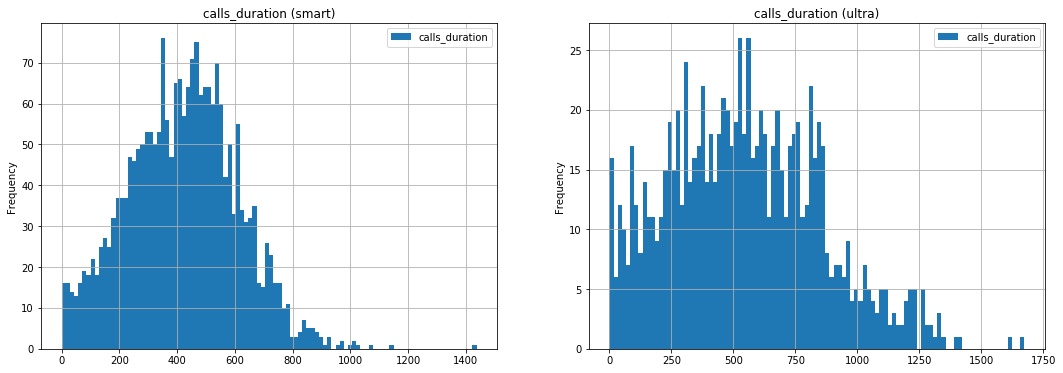

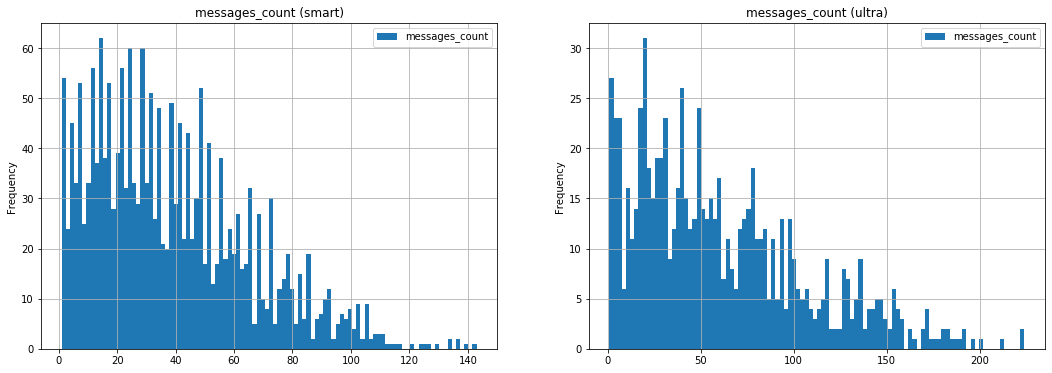

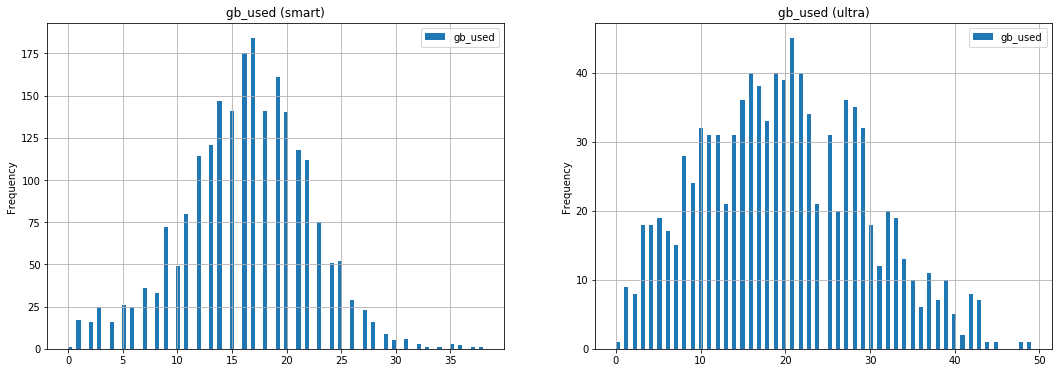

In [26]:
# Построим гистограммы использованных минут, смс и интернет-траффика для каждого тарифа:
hist_columns = ['calls_duration', 'messages_count', 'gb_used']
for column in hist_columns:
    fig, axes = plt.subplots(1,2, figsize=(18,6))
    smart_users_stat.plot(y=column, title=column+' (smart)', kind='hist', grid = True, bins=100, ax=axes[0])
    ultra_users_stat.plot(y=column, title=column+' (ultra)', kind='hist', grid = True, bins=100, ax=axes[1])

**Распределения потраченных минут, сообщений и ГБ:**
- Распределение минут в тарифе "Smart" ассиметричное, со смещением влево. Это также подверждается тем, что медаина у этого значения больше среднего.
- Распределение минут в тарифе "Ultra" также ассиметричное, но со смещением вправо (медиана меньше среднего).
- Распределение сообщений в тарифах "Smart" и "Ultra" ассиметричное, со смещением вправо (медиана отправленных сообщений в обоих тарифах меньше среднего).
- Распределение потраченных ГБ  в тарифах "Smart" и "Ultra" практически симметричное, в обоих тарифах медиана почти равна среднему.

## Проверка гипотез

### Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Для сравнения средней выручки пользователей тарифов «Ультра» и «Смарт» сформулируем гипотезы:
- Нулевую: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
- Альтернативную: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [27]:
# Для проверки гипотезы используем двухсторонний тест для двух выборок.
# В поставленной задаче требуется проверить альтернативную гипотезу, 
# поэтому вывод функции построим с учетом проверки альтернативной гипотезы.

# В наших выборках более 3000 значений, выборку можно считать большой, критический уровень статистической значимости примем 0.01
alpha = 0.01
# если p-value окажется больше или равно нему - отвергнем гипотезу

results_1 = st.ttest_ind(smart_users_stat['monthly_revenue'], ultra_users_stat['monthly_revenue'], equal_var = True)

display('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    display('Не получилось отвергнуть альтернативную гипотезу "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"')
else:
    display('Отвергаем альтернативную гипотезу "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"')

'p-значение:'

6.3377513490750985e-158

'Не получилось отвергнуть альтернативную гипотезу "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"'

**В рамках исследования, гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" отвергнуть не удалось.**

### Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для сравнения средней выручки пользователей из Москвы и регионов сформулируем гипотезы:
- Нулевую: Средняя выручка пользователей из Москвы и пользователей из других регионов равна.
- Альтернативную: Средняя выручка пользователей из Москвы и пользователей из других регионов различается.

In [28]:
# Создадим 2 датафрейма с данными абонентов из Москвы и данными абонентов из других городов:
moscow_users_stats = all_users_stat.query('city == "Москва"')
other_cities_users_stats = all_users_stat.query('city != "Москва"')

# Для проверки гипотезы используем двухсторонний тест для двух выборок.
# В поставленной задаче требуется проверить альтернативную гипотезу, 
# поэтому вывод функции построим с учетом проверки альтернативной гипотезы.

# В наших выборках более 3000 значений, выборку можно считать большой, критический уровень статистической значимости примем 0.01
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется больше или равно нему - отвергнем гипотезу

results_2 = st.ttest_ind(moscow_users_stats['monthly_revenue'], other_cities_users_stats['monthly_revenue'], equal_var = True)

display('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    display('Не получилось отвергнуть альтернативную гипотезу "выручка пользователей из Москвы отличается от выручки пользователей из других регионов"')
else:
    display('Отвергаем альтернативную гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"')


'p-значение:'

0.5350207209820983

'Отвергаем альтернативную гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"'

**В рамках исследования, гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" отвергаем.**

## Общий вывод

- Абоненты тарифа "Ультра" разговаривают, пишут сообщений и тратят интернет-траффика больше абонентов тарифа "Смарт".
- Абонентам тарифа "Смарт" часто не хватает бесплатного лимита минут, смс и ГБ - средние траты пользователей этого тарифа в месяц - 1295 руб., медианные - 1038 руб. (при ежемесячной абонентской плате 550 руб.)
- Абоненты тарифа "Ультра" по большей части укладываются в бесплатный лимит. Средние траты в месяц по тарифу 2071 руб., а медианные равны абонентской плате 1950 руб.
- Сравнение средних и медианных трат абонентов показывает что абоненты тарифа "Ультра" тратят больше денег, чем абоненты тарифа "Смарт". Также гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" опровергнуть не удалось. 
- Гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" отвергаем - с 54% вероятностью такое или большее различие можно получить случайно.